In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datawc = pd.read_csv("WC_AT.csv")

In [3]:
datawc

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [6]:
datawc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


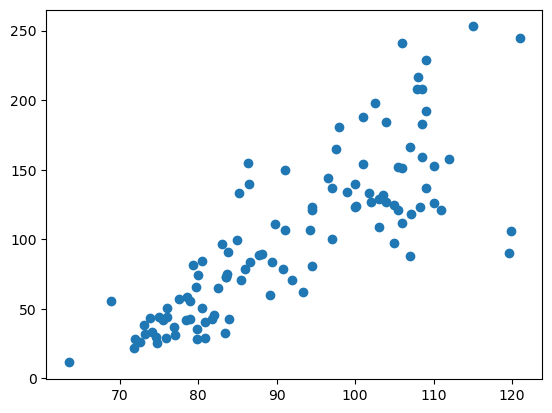

In [8]:
plt.scatter(datawc['Waist'], datawc['AT'])

In [10]:
datawc.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [11]:
# correlation is >0.8. so excellent 

SyntaxError: invalid syntax (1398251326.py, line 1)

In [38]:
import statsmodels.formula.api as smf
model= smf.ols("AT~Waist", data = datawc).fit() ## HERE AT verser waist
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.62e-27
Time:                        18:27:53   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

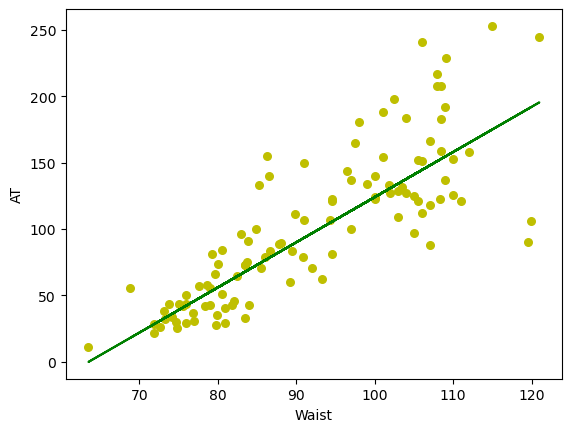

In [24]:
x = datawc['Waist'].values
y = datawc['AT'].values
plt.scatter(x,y, color='y' , marker = 'o', s = 30)
b0 = -215.98
b1 = 3.4

## predicted response vector
Y_hat = b0 + b1*x 

## plotting the regresson line
plt.plot(x,Y_hat , color ='g')
plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()


In [39]:
            model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [40]:
newdata = pd.Series([80,100,65,120])

In [41]:
data_pred = pd.DataFrame(newdata,columns  = ['Waist'])
data_pred

,Waist
0,80
1,100
2,65
3,120


In [30]:
model.predict(data_pred)

0     60.727263
1    129.904451
2      8.844373
3    199.081639
dtype: float64

In [33]:
Y_hat = model.predict(datawc['Waist'])
Y_hat

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [37]:
datawc['Y_hat']= Y_hat
datawc

,Waist,AT,Y_hat
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366
...,...,...,...
104,100.10,124.00,130.250337
105,93.30,62.20,106.730093
106,101.80,133.00,136.130398
107,107.90,208.00,157.229440
